In [51]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [3]:
ds = xr.Dataset({'foo': (('x', 'y'), np.random.rand(4, 3))}, coords={'x': [10, 20, 30, 40], 'letters': ('x', list('abba'))})


In [7]:
ds.foo.shape

(4, 3)

In [7]:
ds.groupby('letters')

In [8]:
ds.groupby('letters').groups

{'a': [0, 3], 'b': [1, 2]}

In [9]:
list(ds.groupby('letters'))

[('a', <xarray.Dataset>
  Dimensions:  (x: 2, y: 3)
  Coordinates:
    * x        (x) int64 10 40
      letters  (x) <U1 'a' 'a'
  Dimensions without coordinates: y
  Data variables:
      foo      (x, y) float64 0.5128 0.6808 0.1599 0.7797 0.6443 0.7016),
 ('b', <xarray.Dataset>
  Dimensions:  (x: 2, y: 3)
  Coordinates:
    * x        (x) int64 20 30
      letters  (x) <U1 'b' 'b'
  Dimensions without coordinates: y
  Data variables:
      foo      (x, y) float64 0.7531 0.6201 0.4595 0.1748 0.4371 0.07166)]

In [13]:
def standardize(x):
    return (x - x.mean()) / x.std()

In [27]:
arr = ds['foo']
arr

<xarray.DataArray 'foo' (x: 4, y: 3)>
array([[0.955353, 0.473226, 0.659576],
       [0.450907, 0.609228, 0.907043],
       [0.823839, 0.685852, 0.660258],
       [0.091461, 0.839526, 0.102883]])
Coordinates:
  * x        (x) int64 10 20 30 40
    letters  (x) <U1 'a' 'b' 'b' 'a'
Dimensions without coordinates: y

In [38]:
arr.groupby('letters').groups

{'a': [0, 3], 'b': [1, 2]}

In [16]:
#arr.groupby('letters').apply(standardize)

<xarray.DataArray 'foo' (x: 4, y: 3)>
array([[ 1.300892, -0.140886,  0.416387],
       [-1.623498, -0.546305,  1.479989],
       [ 0.913879, -0.024964, -0.199101],
       [-1.282535,  0.954519, -1.248378]])
Coordinates:
  * x        (x) int64 10 20 30 40
    letters  (x) <U1 'a' 'b' 'b' 'a'
Dimensions without coordinates: y

In [28]:
ds.groupby('letters').first()

<xarray.Dataset>
Dimensions:  (letters: 2, y: 3)
Coordinates:
  * letters  (letters) object 'a' 'b'
Dimensions without coordinates: y
Data variables:
    foo      (letters, y) float64 0.9554 0.4732 0.6596 0.4509 0.6092 0.907

In [29]:
ds.groupby('y').groups

{0: 0, 1: 1, 2: 2}

In [30]:
ds['letters']

<xarray.DataArray 'letters' (x: 4)>
array(['a', 'b', 'b', 'a'], dtype='<U1')
Coordinates:
  * x        (x) int64 10 20 30 40
    letters  (x) <U1 'a' 'b' 'b' 'a'

In [36]:
alt = arr.groupby('letters').mean()
alt

<xarray.DataArray 'foo' (letters: 2)>
array([0.520337, 0.689521])
Coordinates:
  * letters  (letters) object 'a' 'b'

In [37]:
ds.groupby('letters').groups

{'a': [0, 3], 'b': [1, 2]}

In [69]:
ds_pr = xr.open_dataset('./DOE_VIC.narr_wrf.monthly.pr.1980-2012.nc')
ds_pr_future = xr.open_dataset('./DOE_VIC.narr_wrf.monthly.pr.2091-2100.nc')
ds_pr

<xarray.Dataset>
Dimensions:         (latitude: 128, longitude: 112, nb2: 2, time: 396)
Coordinates:
  * longitude       (longitude) float32 -123.96875 -123.90625 -123.84375 ...
  * latitude        (latitude) float32 35.03125 35.09375 35.15625 35.21875 ...
  * time            (time) datetime64[ns] 1980-01-31 1980-02-29 1980-03-31 ...
Dimensions without coordinates: nb2
Data variables:
    longitude_bnds  (longitude, nb2) float32 ...
    latitude_bnds   (latitude, nb2) float32 ...
    pr              (time, latitude, longitude) float32 ...
Attributes:
    CDI:                Climate Data Interface version 1.6.1 (http://code.zma...
    Conventions:        GDT 1.2
    history:            Fri Jan 19 20:57:17 2018: cdo -O monavg /data5/emaure...
    institution:        DOE, Santa Clara University
    file_name:          DOE_VIC.narr_wrf.daily.pr.1980.nc
    History:            Archived 2017
    authors:            Maurer, E., SCU
    description:        Daily VIC Output
    creation_date:  

In [54]:
#pr_apr = ds_pr.groupby('time.month')
#pr_apr.groups

In [57]:
def mean(x):
    return x.mean()

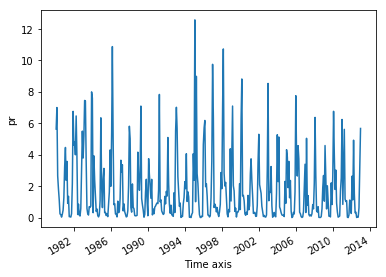

In [58]:
ds_pr['pr'].groupby('time.month').apply(mean).plot()

In [84]:
ds_pr_by_month = ds_pr['pr'].groupby('time.season').mean('time')
ds_pr_future_by_month = ds_pr_future['pr'].groupby('time.season').mean('time')
ds_pr_by_month

<xarray.DataArray 'pr' (season: 4, latitude: 128, longitude: 112)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -123.96875 -123.90625 -123.84375 ...
  * latitude   (latitude) float32 35.03125 35.09375 35.15625 35.21875 ...
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'

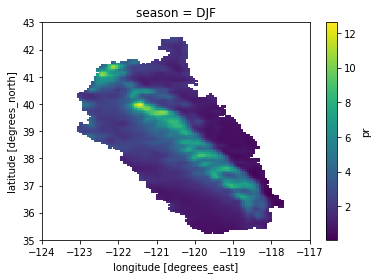

In [86]:
pr_range = ds_pr_future_by_month.sel(season='DJF') - ds_pr_by_month.sel(season='DJF')
pr_range.plot()

In [68]:
pr_range

<xarray.DataArray 'pr' (latitude: 128, longitude: 112)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -123.96875 -123.90625 -123.84375 ...
  * latitude   (latitude) float32 35.03125 35.09375 35.15625 35.21875 ...